In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load Data 

In [110]:
df = pd.read_csv('adult_reconstruction.csv')

# Check for Missing Values

In [111]:
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

#### There are some cells with ? in it, so we replace with nans and check the percentage of missing values.

In [112]:
df.isin(['?']).sum()

hours-per-week       0
age                  0
capital-gain         0
capital-loss         0
workclass         2859
education            0
education-num        0
marital-status       0
relationship         0
race                 0
gender               0
native-country     859
income               0
occupation        2869
dtype: int64

In [113]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)


In [114]:
perc1 = df['workclass'].isnull().sum()/len(df['workclass'])*100
perc2 = df['occupation'].isnull().sum()/len(df['occupation'])*100
perc3 = df['native-country'].isnull().sum()/len(df['native-country'])*100
print("Percentage of the data missing = ", perc1,"%, ", perc2,"%, ", perc3,'%')


Percentage of the data missing =  5.7721426985120425 %,  5.792332074862207 %,  1.7342674284791342 %


In [117]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

In [120]:
## Check if there are any duplicate rows
df.duplicated().sum()

208

In [121]:
df = df.drop_duplicates()

# Analyze Data

In [122]:
print(df.shape)
df.describe()

(45641, 14)


,hours-per-week,age,capital-gain,capital-loss,education-num,income
count,45641.000000,45641.000000,45641.000000,45641.000000,45641.00000,45641.000000
mean,40.915120,38.487566,1080.570759,87.546307,10.10438,34417.740606
std,11.966191,13.211451,7426.000706,402.596785,2.54683,26870.885616
min,1.000000,17.000000,0.000000,0.000000,1.00000,107.000000
25%,40.000000,28.000000,0.000000,0.000000,9.00000,13200.000000
50%,40.000000,37.000000,0.000000,0.000000,10.00000,27260.000000
75%,45.000000,47.000000,0.000000,0.000000,12.00000,49515.000000
max,99.000000,90.000000,99999.000000,4356.000000,16.00000,99999.000000


In [ ]:
## EDA HERE 
## plot kde of income vs 

# Decode categorical data

In [116]:

# df = pd.concat([df.drop('gender', axis=1), pd.get_dummies(df.gender, prefix='gender')], axis = 1)
# df = pd.concat([df.drop('education', axis=1), pd.get_dummies(df.education, prefix='education')], axis = 1)
# df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race, prefix='race')], axis = 1)

# df

###### Create dummy values for all categorical data

In [123]:
# Column called 'female': Value is 1 if female, 0 otherwise
df['female'] = 1*(df['gender'] ==  'Female') 
# Column called 'male': Value is 1 if male, 0 otherwise
df['male'] = 1*(df['gender'] ==  'Male') 
dummy_vars = pd.get_dummies(df[["workclass", "education", "marital-status", "relationship", "race", "native-country", "occupation"]])
dfWithDummy = df.join(dummy_vars)
dfWithDummy.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,...,0,0,0,0,0,0,0,0,1,0
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,...,0,0,0,0,0,0,0,0,0,0
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,...,0,0,0,1,0,0,0,0,0,0
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,...,0,0,0,0,0,0,0,1,0,0
5,38,26,0,1876,Private,Bachelors,13,Never-married,Not-in-family,White,...,0,0,0,0,0,0,0,0,0,0


In [125]:
list(dfWithDummy.columns)

['hours-per-week',
 'age',
 'capital-gain',
 'capital-loss',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income',
 'occupation',
 'female',
 'male',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',


# Explore relationships

<AxesSubplot:xlabel='age', ylabel='Count'>

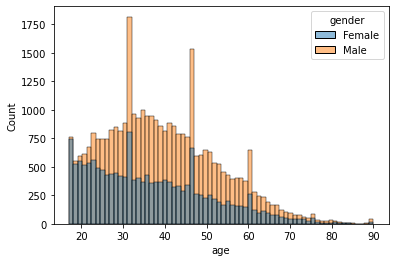

In [10]:
sns.histplot(data=dfWithDummy, x="age", hue="gender")

<AxesSubplot:xlabel='income', ylabel='Count'>

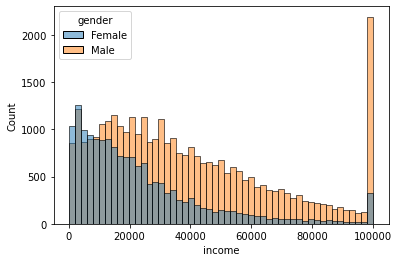

In [11]:
sns.histplot(data=dfWithDummy, x="income", hue="gender")